# Machine Learing With KNN Classifier

In [1]:
# popular libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns

When looking through the data in a notepad (since this is a CSV), I noticed there were ? inputs and that the seperator was a comma followed by a space. To import this data in a nice format I passed through the value of the seperator and declared the na values as a question mark. Another way of doing this step could be using the replace method but I chose to declare the na values upon reading in the csv.

In [2]:
# import data 
df = pd.read_csv("C:/Users/ryans/Documents/Machine Learning GCU/KNN/adult.data", header=None, sep = ',\s', na_values = ['?'])

C:\Users\ryans\AppData\Local\Temp\ipykernel_26652\688267355.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("C:/Users/ryans/Documents/Machine Learning GCU/KNN/adult.data", header=None, sep = ',\s', na_values = ['?'])


In [3]:
# quick glance of our data
df.head(n = 10)

0                 1       2          3   4                      5   \
0  39         State-gov   77516  Bachelors  13          Never-married   
1  50  Self-emp-not-inc   83311  Bachelors  13     Married-civ-spouse   
2  38           Private  215646    HS-grad   9               Divorced   
3  53           Private  234721       11th   7     Married-civ-spouse   
4  28           Private  338409  Bachelors  13     Married-civ-spouse   
5  37           Private  284582    Masters  14     Married-civ-spouse   
6  49           Private  160187        9th   5  Married-spouse-absent   
7  52  Self-emp-not-inc  209642    HS-grad   9     Married-civ-spouse   
8  31           Private   45781    Masters  14          Never-married   
9  42           Private  159449  Bachelors  13     Married-civ-spouse   

                  6              7      8       9      10  11  12  \
0       Adm-clerical  Not-in-family  White    Male   2174   0  40   
1    Exec-managerial        Husband  White    Male      0   0  13   
2  Handlers-cleaners  Not-in-family  White    Male      0   0  40   
3  Handlers-cleaners        Husband  Black    Male      0   0  40   
4     Prof-specialty           Wife  Black  Female      0   0  40   
5    Exec-managerial           Wife  White  Female      0   0  40   
6      Other-service  Not-in-family  Black  Female      0   0  16   
7    Exec-managerial        Husband  White    Male      0   0  45   
8     Prof-specialty  Not-in-family  White  Female  14084   0  50   
9    Exec-managerial        Husband  White    Male   5178   0  40   

              13     14  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4           Cuba  <=50K  
5  United-States  <=50K  
6        Jamaica  <=50K  
7  United-States   >50K  
8  United-States   >50K  
9  United-States   >50K

### The Dataset

This data set is called the "Adult" training set and it is located on the UC Irving Machine Learning Repository. The task is to classify an individual as generating an income of >50K or <=50K. The dataset has 15 different attributes. This data was taken from a 1994 Census database and does not have any personal or unethical information involved that can cause harm to any individual. It was also retrieved from the UC Irving Machine Learning Repository which is a respected data science website for practicing techniques such as machine learning. 

When conducting this study I wish to be able to accurately predict (within reason) whether or not an individual will make more or less than $50,000 using the information that is available to me. I also wish to gain information on relationships of variables such as marital status and education. 

Attributes :
+ Age - age of person
+ Workclass - consists of different workclasses such as state-gov and never worked
+ fnlwgt - socio-economic characteristics weighted (within state only)
+ education - education level such as high school degree
+ education-num - numeric representation of educational level
+ marital-status - married, divorced, widdowed..
+ occupation - job title
+ relationship - husband, wife, only child
+ race - race of person
+ sex - sex of person
+ capital-gain - if positive, capital gains were made
+ capital-loss - if positive, capital losses were made
+ hours-per-week - work hours per week
+ native-country - country they are from
+ income - target variable over or under 50K.




In [4]:
# check current column names
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [5]:
# create column names using a dictionary to replace them.
df.rename(columns = {
   0 :'age',
   1 :'workclass',
   2 :'fnlwgt',
   3 :'education',
   4 :'education-num',
   5 :'marital-status',
   6 :'occupation',
   7 :'relationship',
   8 :'race',
   9 :'sex',
   10 :'capital-gain',
   11 :'capital-loss',
   12 :'hours-per-week',
   13 :'native-country',
   14 :'income'
}, inplace = True)

In [6]:
# view head to see if it is formatted correctly with new column names
df.head(n = 5)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

### Exploratory Data Analysis

Now that we have successfully transferred in our data it is time for some Exploratory Data Analysis (EDA). The goal of this step is to learn more about the data that we are working with and get it ready for machine learning and model building. A good initial look at df.head() followed by df.shape will show us the first 5 rows of our data and tell us the amount of rows and columns that we are starting off with. The data has over 30,000 rows, or instances, and 15 columns, or variables. This meets our guideline of having over 10,000 rows and 10 variables so we are ready to move forward with the selected data. 

By looking at the variable names (columns) we can see that the income variable will be our target variable. Although this number is representitive of dollars earned which is a continuous numerical value, it appears there are only two possible outcomes being >50K and <=50K. This means that our dollar amount is actually a categorical value and that classification should be used instead of regression. The goal will be to predict the annual income based on these variables. 

In [7]:
# possible outcome of our target variable.
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [8]:
# view shape of our data
df.shape

(32561, 15)

The library that I am most comfortable working with at this stage in my graduate program is sklearn. This library does not work with missing values for many of the machine learning tools they have so we should check for missing values and determine a way of filling the data, or removing the observation with incomplete data entirely. For this assignment I will be filling the empty rows with the most frequent occuring value since they happen to be categorical values. While looking for missing values using the df.info() method we also see that our target variable 'income' has the dtype listed as object which is something that we take note of and will have to be addressed later.

In [9]:
# check info for null count and determine if it is quantitative or qualitative missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
# sum the null counts
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

There are three variables in our data that have missing values. The missing values are all around 5 percent or less of our total data. This tells us that we should be able to safely impute our most frequent value for the variable since they are all categorical. Let's check the unique values of the variables using a for loop. 

In [11]:
# loop through our data and print the column name, count of unique, and unique values
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

age 73 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass 9 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt 21648 [ 77516  83311 215646 ...  34066  84661 257302]
education 16 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num 16 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status 7 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation 15 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-supp

The workclass has 9 different categorical values. We can just print the value counts to see what the distribution is.

In [12]:
# display the value counts of the different workclasses
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

<Axes: title={'center': 'Workclass Frequencies'}>

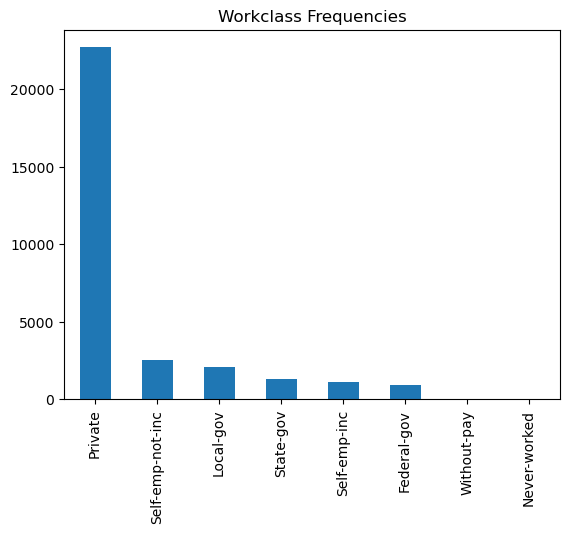

In [13]:
# simple bar chart of the workclass occurences.
df['workclass'].value_counts().plot(kind = 'bar', title = "Workclass Frequencies")

Since the missing data for each variable is very small we can use SimpleImputer to input the most frequently occuring category without drastically changing the results of a predictive model. 

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
# impute the most frequent occuring category for each variable with missing values
freq_impute = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
# fit to our data
freq_imputer = freq_impute.fit(df[['workclass', 'occupation', 'native-country']])
# transform our data using the fit
df[['workclass', 'occupation', 'native-country']] = freq_imputer.transform(df[['workclass', 'occupation', 'native-country']])

In [16]:
# check that it worked by our non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now that our data has no missing values we can find summary statistics on the numerical values using the describe function. The main thing that sticks out to us here is that the possible range of the variables differs significantly. This tells us that our data will need to be standardized so that we will not introduce any bias in our model. 

In [17]:
# descriptive statistics of numerical variables
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [18]:
# descriptive statistics of the categorical variables
df.describe(include = 'object')

workclass education      marital-status      occupation relationship  \
count      32561     32561               32561           32561        32561   
unique         8        16                   7              14            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       24532     10501               14976            5983        13193   

         race    sex native-country income  
count   32561  32561          32561  32561  
unique      5      2             41      2  
top     White   Male  United-States  <=50K  
freq    27816  21790          29753  24720

<Axes: title={'center': 'Target Variable Distribution'}>

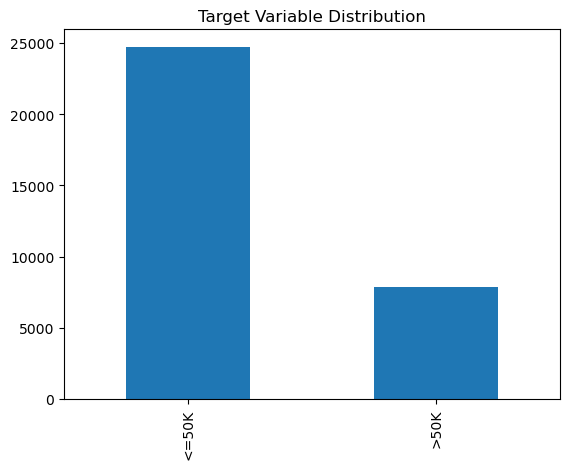

In [19]:
# this data is unbalanced so we should use StratifiedKFold cross-validation later.
df['income'].value_counts().plot(kind = 'bar', title = 'Target Variable Distribution')

In [20]:
# import ydata_profiling library for EDA
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Census Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The report tells us that there are some duplicates so we can remove the redundant information before building our model. Although there are not many duplicates and this is not an extremely large dataset these duplicates should be removed to reduce the memory for our model. It also tells us that the 'education' feature is highly correlated with 'education number' feature so we should look in to this relationship. 
The following value counts show us that the 'education' and 'education number' are the same thing. The education number is just a numerial representation of the education field. This means we should only use one of the fields for the machine learning model. For example, it appears that HS-grad is labeled as a 9 in the education-num variable. Since these are both ordinal variables we can also choose to use polychoric correlation but since we already know that they are the same thing we do not have to go any further. This information is also displayed for us in the y-profiling report heatmap and correlation table which shows a correlation of 1.00. The table also shows that there is correlation between sex and relationship at .649. A general rule of thumb is that high correlation exists over a .7 so this is something we may want to investigate further. The y-profiling library is great for exploratory data analysis because it converts the categorical variables to numerical so that it is compatable with heatmaps but does not change our data frame values. 

In [21]:
# drop duplicates
df.drop_duplicates(inplace = True)
# check that shape has changed
df.shape

(32537, 15)

In [22]:
df['education-num'].value_counts()

9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education-num, dtype: int64

In [23]:
df['education'].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

After noticing that the two columns are the same we can remove one. We can also tell that this information is more detailed than we would like when trying to predict a persons income. Instead of breaking the school up by so many different categories we can combine categories to make this data more useable. In practice, someone with 1st-4th level education may have less knowlege than someone with 10th level education which can in turn lessen their income, but we would like to avoid overfitting and someone without a high school degree is likely to earn less than those who have one so we can group all those who do not have a high school diploma together in one variable category. This is a form of feature engineering since we are essentially creating a new variable based off an original variable.

In [24]:
# change the education variable to be more meaningful
df['education'] = df['education'].replace(['Preschool', '1st-4th', '5th-6th',
                                           '7th-8th', '9th', '10th', '11th', '12th'], 'No_degree')
# change some college fields
df['education'] = df['education'].replace(['Assoc-acdm', 'Assoc-voc', 'Prof-school', 'Some-college'], 'Associate')

# view new value counts
df['education'].value_counts()

HS-grad      10494
Associate    10307
Bachelors     5353
No_degree     4248
Masters       1722
Doctorate      413
Name: education, dtype: int64

Marital-status has some categories that appear to be related. We can look at the proportion of the income to see if any of the categories relate to eachother so that they can be combined. For instance, married-af-spouse is probably something that we can change to being just married. This category does not seem like it has to be different. We can use a normalized contingency table to see if this behaves similarly to the married-civ-spouse. By the results, we see that the proportion of >50K for each category is very similar so we can combine these without skewing our prediction results. It is also worth noting that there are only 23 married-af-spouses so it would not make much of a difference with our data set.

In [25]:
# check marital status categories
df['marital-status'].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [26]:
# Married-AF-spouse contingency table
contingency = pd.crosstab(df['income'], df['marital-status'])
contingency

marital-status  Divorced  Married-AF-spouse  Married-civ-spouse  \
income                                                            
<=50K               3978                 13                8280   
>50K                 463                 10                6690   

marital-status  Married-spouse-absent  Never-married  Separated  Widowed  
income                                                                    
<=50K                             384          10176        959      908  
>50K                               34            491         66       85

Now we can calculate the proportion of the married-civ-spouse and married-af-spouse that have >50k to compare the relationship. These two categories behave similarly because roughly 45% of those who are married earn over 50k and roughly 43% of those who are married-af-spouse earn over 50k. Thus we can combine the two categories.

In [27]:
# proportion for married-civ-spouse
total = 8280 + 6690
(6690 / total)

0.4468937875751503

In [28]:
# proportion for married-af-spouse
(10 / 23)

0.43478260869565216

In [29]:
# move the married-af-spouses to the married-civ-spouses.
df['marital-status'] = df['marital-status'].replace('Married-AF-spouse', 'Married-civ-spouse')

In [30]:
# check that the possible marital-status has been updated.
df['marital-status'].value_counts()

Married-civ-spouse       14993
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Name: marital-status, dtype: int64

When we were comparing the different results of our contingency table with the target value we were using a string. Our target variable should be changed into a binary result by replacing the values with 1 and 0. For this task we will change '<=50K' to 0 and '>50k' to one. 

In [31]:
# change target variable to 1 and 0
df['income'] = df['income'].replace({
    '<=50K' : 0,
    '>50K' : 1
})

In [32]:
# verify replacement
df['income'].value_counts()

0    24698
1     7839
Name: income, dtype: int64

### fnlwgt

In [33]:
# remove this column
df = df.drop(['fnlwgt'], axis = 1)

In [34]:
# check that it has been removed
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

### Capital Gain

To gain a better sense of our "capital-gain" feature we can plot a histogram. Based on the results of our histogram we see there are many valued at 0 and outliers around 100,000. 

Text(0.5, 1.0, 'Capital Gains Histogram')

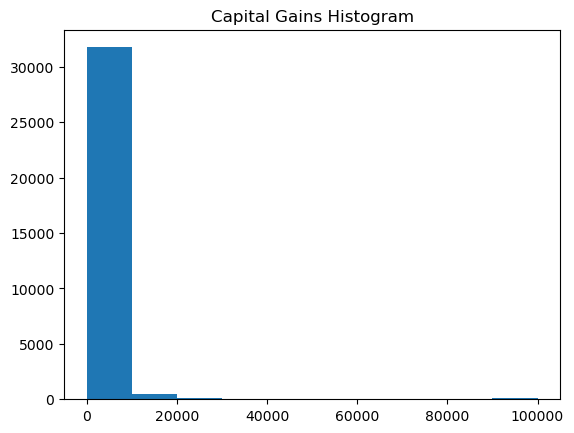

In [35]:
plt.hist(df['capital-gain'])
plt.title("Capital Gains Histogram")

{'whiskers': [<matplotlib.lines.Line2D at 0x2cd0ba5b220>,
 'caps': [<matplotlib.lines.Line2D at 0x2cd0ba5b070>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cd0ba59e70>],
 'medians': [<matplotlib.lines.Line2D at 0x2cd0ba5ba00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cd0ba5a3b0>],
 'means': []}

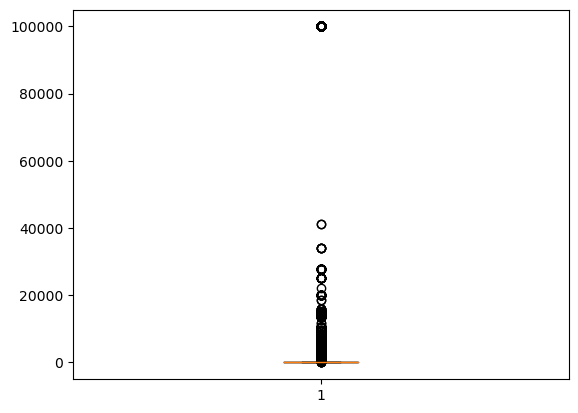

In [36]:
# capital gain boxplot
plt.boxplot(df['capital-gain'])

In [37]:
from scipy import stats
# create a dataframe for outlier detection
out_df = df.copy()
# standardize capital-gain
out_df['gain_z'] = stats.zscore(out_df['capital-gain'])

In [38]:
# determine outliers over and under threshold of 3 standard deviations
gain_outliers = out_df.query('gain_z > 3 | gain_z < -3')


In [39]:
# sort the outliers
outliers_sorted = gain_outliers.sort_values(['gain_z'], ascending = False)
outliers_sorted

age     workclass  education  education-num      marital-status  \
17330   47       Private    Masters             14  Married-civ-spouse   
19080   47       Private  Associate             10  Married-civ-spouse   
19133   69       Private  Bachelors             13  Married-civ-spouse   
19438   58       Private  Associate             10  Married-civ-spouse   
19807   48       Private  Bachelors             13  Married-civ-spouse   
...    ...           ...        ...            ...                 ...   
11826   59     State-gov  Doctorate             16            Divorced   
1562    75       Private  Bachelors             13             Widowed   
21892   65       Private  Associate             15       Never-married   
18847   73       Private  Associate             11             Widowed   
22462   68  Self-emp-inc  Associate             11             Widowed   

            occupation   relationship   race     sex  capital-gain  \
17330  Exec-managerial        Husband  White    Male         99999   
19080            Sales        Husband  White    Male         99999   
19133   Prof-specialty        Husband  White    Male         99999   
19438   Prof-specialty        Husband  White    Male         99999   
19807     Tech-support           Wife  White  Female         99999   
...                ...            ...    ...     ...           ...   
11826   Prof-specialty      Unmarried  White    Male         25236   
1562    Prof-specialty  Not-in-family  White  Female         25124   
21892   Prof-specialty  Not-in-family  White    Male         25124   
18847   Prof-specialty  Not-in-family  White    Male         25124   
22462            Sales  Not-in-family  White  Female         25124   

       capital-loss  hours-per-week native-country  income     gain_z  
17330             0              50  United-States       1  13.389638  
19080             0              60  United-States       1  13.389638  
19133             0              40  United-States       1  13.389638  
19438             0              40  United-States       1  13.389638  
19807             0              40  United-States       1  13.389638  
...             ...             ...            ...     ...        ...  
11826             0              45  United-States       1   3.269906  
1562              0              16  United-States       1   3.254746  
21892             0              80  United-States       1   3.254746  
18847             0              60  United-States       1   3.254746  
22462             0              50  United-States       1   3.254746  

[215 rows x 15 columns]

After sorting our z-scores and determining the outliers as those with a z-score greater than 3 and less than 3 we can see what these results are in terms of our target variable. The highest z-score is 13 which is well beyond out threshold but it appears there are multiple instances of this which happens when the capital-gain is equal to 99999. Using common sense we would infer that those making 99999 in capital gains will be making over 50k but we can verify this. We also see that most of the people making over 25,000 in capital gains make an income over 50k. Although these are outliers they tell us that these people are more likely to make over 50,000 in income. Therefore, we will not remove the outliers but in a real-world setting we would talk to our client and ask them what they would like to do and explain the consequences of both keeping the outliers and removing the outliers. Often times these are removed but held in a new data frame for all the outliers. 

In [40]:
# capital gain of 99999 and income greater than 50k
len(out_df[(out_df['capital-gain']== 99999) & (out_df['income']==1)])

159

In [41]:
# capital gain of 99999 and income less than 50k.
len(out_df[(out_df['capital-gain']== 99999) & (out_df['income']==0)])

0

In [42]:
len(out_df[(out_df['capital-gain'] > 25000) & (out_df['income']==1)])

208

In [43]:
len(out_df[(out_df['capital-gain'] > 25000) & (out_df['income']==0)])

7

### Capital Loss

The same process can be done for capital loss. Before diving in to the numbers we would assume that the higher capital loss an individual has, the less likely they are to earn over 50k in income. We can explore this assumption.

In [44]:
# standardize capital-loss
out_df['loss_z'] = stats.zscore(out_df['capital-loss'])

In [45]:
# determine outliers over and under threshold of 3 standard deviations
loss_outliers = out_df.query('loss_z > 3 | loss_z < -3')

In [46]:
# sort the outliers
loss_outliers_sorted = loss_outliers.sort_values(['loss_z'], ascending = False)
loss_outliers_sorted

age    workclass  education  education-num marital-status  \
8963    90      Private    HS-grad              9        Widowed   
30781   66      Private  Associate             10        Widowed   
14756   82      Private    HS-grad              9        Widowed   
20416   54      Private  No_degree              4       Divorced   
23802   41      Private  Associate             10      Separated   
...    ...          ...        ...            ...            ...   
1518    25      Private  Bachelors             13  Never-married   
25042   38      Private  Bachelors             13  Never-married   
31324   37      Private  Bachelors             13  Never-married   
2630    42  Federal-gov  No_degree              7  Never-married   
20870   44    Local-gov  Associate             11  Never-married   

              occupation   relationship   race     sex  capital-gain  \
8963      Prof-specialty  Not-in-family  White  Female             0   
30781     Prof-specialty      Unmarried  Black  Female             0   
14756    Exec-managerial  Not-in-family  White  Female             0   
20416  Machine-op-inspct      Unmarried  White  Female             0   
23802     Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
1518     Exec-managerial      Own-child  White    Male             0   
25042    Exec-managerial  Not-in-family  White    Male             0   
31324     Prof-specialty  Not-in-family  White  Female             0   
2630        Tech-support  Not-in-family  White    Male             0   
20870       Tech-support  Not-in-family  White    Male             0   

       capital-loss  hours-per-week native-country  income    gain_z  \
8963           4356              40  United-States       0 -0.145975   
30781          4356              40  United-States       0 -0.145975   
14756          4356              18  United-States       0 -0.145975   
20416          3900              40  United-States       0 -0.145975   
23802          3900              40  United-States       0 -0.145975   
...             ...             ...            ...     ...       ...   
1518           1340              40  United-States       0 -0.145975   
25042          1340              40  United-States       0 -0.145975   
31324          1340              42  United-States       0 -0.145975   
2630           1340              40  United-States       0 -0.145975   
20870          1340              40  United-States       0 -0.145975   

          loss_z  
8963   10.589625  
30781  10.589625  
14756  10.589625  
20416   9.458380  
23802   9.458380  
...          ...  
1518    3.107530  
25042   3.107530  
31324   3.107530  
2630    3.107530  
20870   3.107530  

[1470 rows x 16 columns]

In [47]:
# view those with high loss_z and income of 0 and 1
len(out_df[(out_df['capital-loss'] > 2000) & (out_df['income'] == 0)])

183

In [48]:
# high capital loss but income over 50k
len(out_df[(out_df['capital-loss'] > 2000) & (out_df['income'] == 1)])

142

In our y-profiling report we got a warning for these two variables for a high number of 0s. This is because over 90% of the participants in our data do not have any capital gains or capital losses. One technique we could use to solve this is to dichotomize the variable. We can say that anyone that has capital gains > 0 will be encoded with a 1 and anyone with capital losses will be encoded with a 1. This can be used if the capital gains have a high relationship with our target variable. Let's explore the relationship now. Based off our findings we see that roughly 62% of people with any capital gains are making over 50k. I would like this number to be higher if I was to dichotomize this variable so we will leave it as is.

In [49]:
# any capital gains and over 50k
over = len(df[(df['capital-gain'] > 0) & (out_df['income'] == 1)])

In [50]:
# any capital gains and under 50k
under = len(df[(df['capital-gain'] > 0) & (out_df['income'] == 0)])

In [51]:
# calculation of those with capital gains and over 50k
tot = over + under
(over / tot)

0.6183628318584071

### Age

Text(0.5, 1.0, 'Age Histogram')

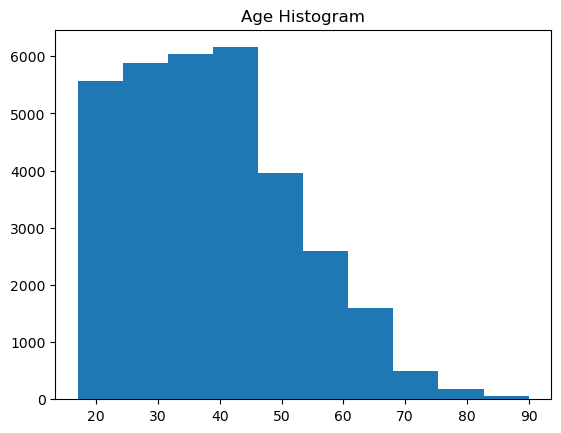

In [52]:
plt.hist(df['age'])
plt.title('Age Histogram')

In [53]:
# age histogram with income overlay
age_over = df[df['income'] == 1]['age']
age_under = df[df['income'] == 0]['age']

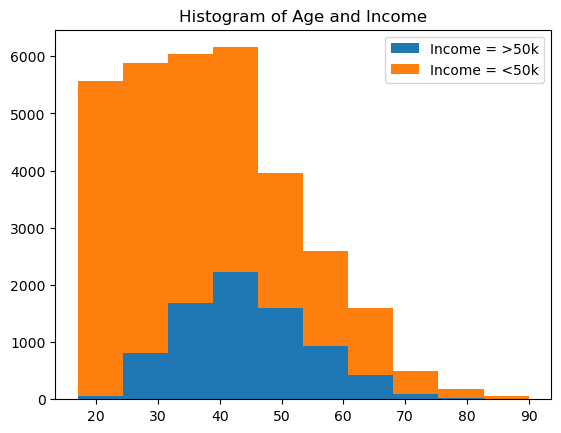

In [54]:
# plot 
plt.hist([age_over, age_under], bins = 10, stacked = True)
plt.title("Histogram of Age and Income")
plt.legend(['Income = >50k', 'Income = <50k'])

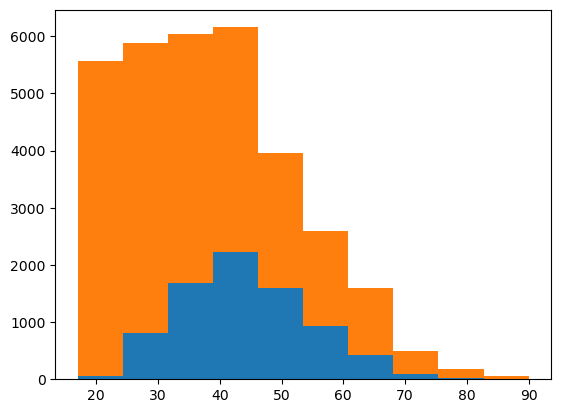

In [55]:
# normalized age and income plot
(n, bins, patches) = plt.hist([age_over, age_under], bins = 10, stacked = True)
# table of height
n_table = np.column_stack((n[0], n[1]))

In [56]:
# normalize values
n_norm = n_table / n_table.sum(axis=1)[:, None]

In [57]:
# change the bins
updated_bins = np.column_stack((bins[0:10], bins[1:11]))

Now we can display the normalized graph. This graph shows us that although there are not many older people in our Census data, they make more than 50K at a higher rate than those who are in there 20s, but less than those between 30-60. 

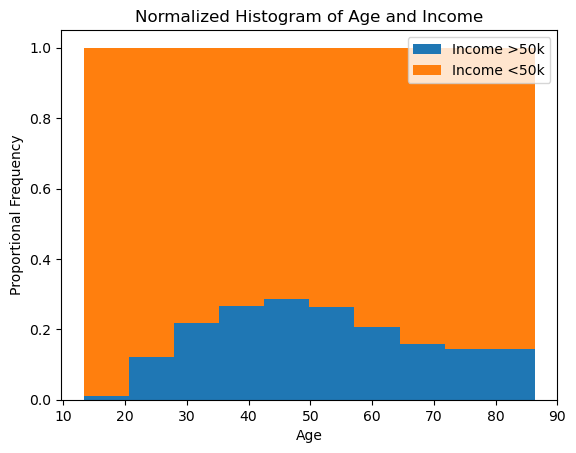

In [58]:
p1 = plt.bar(x = updated_bins[:,0], height = n_norm[:,0], width = updated_bins[:, 1] - updated_bins[:, 0])
p2 = plt.bar(x = updated_bins[:,0], height = n_norm[:,1], width = updated_bins[:, 1] - updated_bins[:, 0], bottom = n_norm[:,0])
plt.legend(['Income >50k', 'Income <50k'])
plt.title('Normalized Histogram of Age and Income')
plt.xlabel('Age')
plt.ylabel('Proportional Frequency')
plt.show()

Now we can see if there are any values that do not seem to make sense to us. In our data we see that there is a variable for hours worked and another variable for age. We should see how often the older people are working, and if there are any outliers in the hours worked variable all together. The minimum age is 17, the median age is 37 and the oldest person is 90 years old. The retirement age is 65 but many people do not retire at this age and someone with a very high paying job may work well into their 70s. We can view the outliers of this variable as we did with the capital gains. Before we look at z-scores we can pick a number that we feel is old and see if they are making over 50k. Here I chose 80 years old and I see there are some people that are in fact making over 50k. One thing that stands out at me is index 8806. This individual is 90 years old and works 72 hours a week. This is equivalent to working 12 hours a day for 6 days a week! This seems like an outlier or an error in reporting so we should observe this phenomenon more carefully. 

In [59]:
df['age'].describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [60]:
df[(df['age'] > 80) & (df['income'] == 1)]

age     workclass  education  education-num      marital-status  \
5370    90     Local-gov    Masters             14  Married-civ-spouse   
5406    90       Private    Masters             14       Never-married   
8806    90       Private  Associate             15  Married-civ-spouse   
8973    90       Private  Bachelors             13  Married-civ-spouse   
10545   90       Private    HS-grad              9  Married-civ-spouse   
11238   84  Self-emp-inc  Associate             10  Married-civ-spouse   
15892   90       Private  Bachelors             13  Married-civ-spouse   
20610   90       Private    Masters             14  Married-civ-spouse   
21501   81       Private    HS-grad              9  Married-civ-spouse   
23459   83  Self-emp-inc  No_degree              6  Married-civ-spouse   
24395   83  Self-emp-inc  Bachelors             13  Married-civ-spouse   
24560   81       Private  Bachelors             13             Widowed   
29724   81       Private  Associate             15  Married-civ-spouse   
31696   90       Private    HS-grad              9  Married-civ-spouse   

            occupation   relationship   race     sex  capital-gain  \
5370   Exec-managerial        Husband  White    Male         20051   
5406   Exec-managerial  Not-in-family  Black    Male             0   
8806    Prof-specialty        Husband  White    Male         20051   
8973             Sales        Husband  White    Male          9386   
10545     Craft-repair        Husband  White    Male          9386   
11238            Sales        Husband  White    Male             0   
15892  Exec-managerial           Wife  White  Female             0   
20610   Prof-specialty           Wife  White  Female             0   
21501  Exec-managerial        Husband  White    Male             0   
23459  Farming-fishing        Husband  White    Male         20051   
24395  Exec-managerial        Husband  White    Male             0   
24560            Sales  Not-in-family  White    Male             0   
29724   Prof-specialty        Husband  White    Male             0   
31696   Prof-specialty        Husband  White    Male             0   

       capital-loss  hours-per-week native-country  income  
5370              0              60  United-States       1  
5406              0              50  United-States       1  
8806              0              72  United-States       1  
8973              0              15  United-States       1  
10545             0              50        Ecuador       1  
11238             0              35  United-States       1  
15892             0              40        England       1  
20610             0              40  United-States       1  
21501          2377              26  United-States       1  
23459             0              50  United-States       1  
24395          2392              55  United-States       1  
24560             0              50  United-States       1  
29724             0              24  United-States       1  
31696             0              40  United-States       1

In [61]:
out_df['age_z'] = stats.zscore(out_df['age'])

In [62]:
# sorted z-scores for age
outlier_age = out_df.query('age_z > 3 | age_z < -3')

In [63]:
# sort these outliers and view the dataframe
outlier_age_sorted = outlier_age.sort_values(['age_z'], ascending = False)
outlier_age_sorted

age         workclass  education  education-num      marital-status  \
222     90           Private    HS-grad              9       Never-married   
8806    90           Private  Associate             15  Married-civ-spouse   
8973    90           Private  Bachelors             13  Married-civ-spouse   
28463   90       Federal-gov    HS-grad              9  Married-civ-spouse   
10210   90  Self-emp-not-inc  Associate             10  Married-civ-spouse   
...    ...               ...        ...            ...                 ...   
18037   80  Self-emp-not-inc    HS-grad              9       Never-married   
25397   80           Private    HS-grad              9  Married-civ-spouse   
14104   80           Private  Associate             15  Married-civ-spouse   
14604   80           Private  Associate             10             Widowed   
20953   80           Private    HS-grad              9  Married-civ-spouse   

            occupation   relationship   race     sex  capital-gain  \
222      Other-service  Not-in-family  Black    Male             0   
8806    Prof-specialty        Husband  White    Male         20051   
8973             Sales        Husband  White    Male          9386   
28463     Craft-repair        Husband  White    Male             0   
10210  Farming-fishing        Husband  White    Male             0   
...                ...            ...    ...     ...           ...   
18037  Exec-managerial  Not-in-family  White    Male             0   
25397   Prof-specialty        Husband  White    Male             0   
14104   Prof-specialty        Husband  White    Male             0   
14604     Adm-clerical  Not-in-family  White  Female             0   
20953   Prof-specialty        Husband  White    Male             0   

       capital-loss  hours-per-week native-country  income    gain_z  \
222            2206              40  United-States       0 -0.145975   
8806              0              72  United-States       1  2.568078   
8973              0              15  United-States       1  1.124490   
28463             0              30  United-States       0 -0.145975   
10210             0              40  United-States       0 -0.145975   
...             ...             ...            ...     ...       ...   
18037             0              20  United-States       0 -0.145975   
25397             0              25  United-States       0 -0.145975   
14104             0              35  United-States       1 -0.145975   
14604             0              20  United-States       0 -0.145975   
20953             0               8         Canada       0 -0.145975   

         loss_z     age_z  
222    5.255903  3.770003  
8806  -0.216743  3.770003  
8973  -0.216743  3.770003  
28463 -0.216743  3.770003  
10210 -0.216743  3.770003  
...         ...       ...  
18037 -0.216743  3.036746  
25397 -0.216743  3.036746  
14104 -0.216743  3.036746  
14604 -0.216743  3.036746  
20953 -0.216743  3.036746  

[120 rows x 17 columns]

We have been keeping the outliers in our model at this point but when it comes to the hours per week variable I would like to remove some extreme values because they do not seem reasonable to me. Of course someone like a CEO may work 72 hours a week but this 12 hours a day for 6 out of 7 days in a week so I am thinking this is an extreme outlier, or a reporting error. I also want to remove these outliers because it seems like some very old people are working these extremely long hours. 

In [64]:
# number of people over 70 working over 60 hours a week
len(out_df[(out_df['age'] > 70) & (out_df['hours-per-week'] > 60)])

12

In [65]:
# all individuals working over 70 hours a week
len(out_df[(out_df['hours-per-week'] > 72)])

427

In [66]:
# check pre-outlier drop shape
df.shape

(32537, 14)

In [67]:
# drop all rows with hours per week > 70
df.drop(df[df['hours-per-week'] > 70].index, inplace=True)

In [68]:
# new data frame shape after removing the hours worked outlier
df.shape

(32039, 14)

### Native Country

The feature 'native-country' has many unique values which will make feature selection difficult after being encoded. This would create 41 different columns with each corresponding to a different country they belong to. By looking at this data we can see that over 90% of people are native to the United States. Since most people belong to one category we can change this variable to be United States or other. 

In [69]:
df['native-country'].value_counts()

United-States                 29281
Mexico                          623
Philippines                     194
Germany                         137
Canada                          120
Puerto-Rico                     113
El-Salvador                     106
India                            98
Cuba                             95
England                          88
Jamaica                          81
South                            79
China                            75
Italy                            70
Dominican-Republic               67
Vietnam                          66
Guatemala                        62
Japan                            60
Poland                           60
Columbia                         59
Taiwan                           50
Haiti                            43
Iran                             43
Portugal                         36
Nicaragua                        34
Peru                             31
Ecuador                          28
France                      

In [70]:
df['native-country'] = df['native-country'].apply(lambda country: 'US' if country == 'United-States' else 'Other')

In [71]:
df['native-country'].value_counts()

US       29281
Other     2758
Name: native-country, dtype: int64

### Relationship Variable

Our relationship variable contains the following information
+ Husband
+ Not-in-family
+ Own-child
+ Unmarried
+ Wife
+ Other

When looking at the types of relationships there are we can see some correlation with our marital-status and sex variables. Anyone who is a husband or wife should be listed in the marital-status 'married' and a husband will be a male in the sex variable so we already have this information listed elsewhere in our data. For these reasons, I will drop the relationship variable from our data before fitting a model.

In [73]:
# view the possible relationship values
df['relationship'].value_counts()

Husband           12901
Not-in-family      8176
Own-child          5018
Unmarried          3412
Wife               1558
Other-relative      974
Name: relationship, dtype: int64

In [74]:
# drop relationship from our data
df= df.drop(['relationship'], axis = 1)

In [75]:
df.head()

age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private  No_degree              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   race     sex  capital-gain  capital-loss  \
0       Adm-clerical  White    Male          2174             0   
1    Exec-managerial  White    Male             0             0   
2  Handlers-cleaners  White    Male             0             0   
3  Handlers-cleaners  Black    Male             0             0   
4     Prof-specialty  Black  Female             0             0   

   hours-per-week native-country  income  
0              40             US       0  
1              13             US       0  
2              40             US       0  
3              40             US       0  
4              40          Other       0

### Partitioning the Data into Train and Test Splits

Now that our features have been engineered we can move on to splitting our data into the features and target variable. The features will be X and the target variable will be y. After we have these split we can also use feature selection techniques such as a filter or wrapper method to choose the best features. We do not have many features and we do not have many warnings from our yprofiling about correlation besides sex and relationship showing correlation so we can use a feature selection method to choose which of the two we would like to remove. We will also be using pipelines and a column transformer to finish the preprocessing for us. This will perform a StandardScaler on our numerical features and OneHotEncoder on our categorical features.

In [78]:
# import libraries for next steps
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

Education-num is a numerical feature. This is because the data set had a numerical representation of the educational level for each observation. We went through and preprocessed the education feature so we can drop the education-num feature now.

In [79]:
df = df.drop('education-num', axis = 1)


In [82]:
# final preprocessing for our data. Set up numeric features
numeric_features = df.drop('income', axis = 1).select_dtypes(exclude = 'object').columns
numeric_features

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [83]:
# set up categorical features for pipeline
categorical_features = df.select_dtypes('object').columns
categorical_features

Index(['workclass', 'education', 'marital-status', 'occupation', 'race', 'sex',
       'native-country'],
      dtype='object')

In [84]:
# pipeline to implement standard scaler for numeric columns
numeric_pipeline = Pipeline([('scale', StandardScaler())])

In [85]:
# pipeline for categorical column 
categorical_pipeline = Pipeline([('encode', OneHotEncoder())])

In [86]:
# use column transformer along with the pipelines to implement them
# format is - name of pipeline, pipeline to use, what to use it on
transformer = ColumnTransformer([
    ('numeric_pipeline', numeric_pipeline, numeric_features),
    ('categorical_pipeline', categorical_pipeline, categorical_features)
])


In [87]:
# view the steps
transformer

ColumnTransformer(transformers=[('numeric_pipeline',
                                 Pipeline(steps=[('scale', StandardScaler())]),
                                 Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('encode', OneHotEncoder())]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation', 'race', 'sex',
       'native-country'],
      dtype='object'))])

Now we have set up a pipeline that will take the numerical features (besides our target variable) and standardize them and also encode the categorical features. Next, we can create our feature and target variables as X and y.

In [88]:
# create X and y
X = df.drop('income', axis = 1)
y = df['income']

In [89]:
X1 = transformer.fit_transform(X)

In [90]:
# verify the feature columns
X.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country'],
      dtype='object')

In [91]:
# train test split using 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### KNN Classifier

At this point our data has been explored, extracted and selected so it is ready to be used in a model. The goal of this project is to predict whether or not an individual will make more or less than 50K income. To do so, I will be using a K-nearest neighbors model. 

This model works on data that has a target variable that is labeled. For instance, someone making less than 50K is labeled 0 and someone making more than 50K is labeled 1. These are the labels that each observation belongs to. This data will be fed into our training set and our data will learn what makes an individual belong to each label. Then, we will feed the model new data from our test set that it has not seen before. Based on similarities between the new information and the learned information, the model will classify each new observation into a label. The "k" in knn is the number of neighbors. This is the number of similar observations that we will be comparing to. The neighbors will all be classified into a label and a majority vote is made. The majority vote is just our model choosing to label the new observation based on the label with the highest occurencies surrounding our new data. For example, if we choose k = 3 and all 3 of the most similar data points next to our new data are labeled "1", the new data will be labeled "1". 

To find those who are the most similar to our new data point we need to choose a distance measure. The most popular distance measure is called the Euclidean Distance which can be expressed in the following equation:

$ d (x, y)  = \sqrt{\sum \limits_{i}(x_{i} - y_{i})^2}$

This equation shows why it is so important to standardize or normalize the variables in a knn model. In our data we have capital gain that ranges all the way up to 99999 and the capital loss is on a much smaller scale so we standardize the data so that the range is smaller. If we are to normalize the data it would be between [0, 1], but we want the influence of our outliers so we chose to standardize the data instead.

In [110]:
# import library for KNN model
from sklearn.neighbors import KNeighborsClassifier
# create a pipeline with the model
model_pipeline = Pipeline(steps = [('preprocess', transformer),
                                   ('knn', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))])

In [111]:
# fit pipeline to our data
model = model_pipeline.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [25631, 25632]

In [ ]:
# fit model to our X_test, y-test
model.score(X_test, y_test)

In [95]:
# make predictions from our model
y_pred = model_pipeline.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
predictions = pd.DataFrame(y_pred)
predictions[0].value_counts()

0    5008
1    1400
Name: 0, dtype: int64

In [97]:
# we can also import accuracy score and display it this way
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_hat = accuracy_score(y_test, y_pred)

In [98]:
# show accuracy score
y_hat

0.8288077403245943

We can use ConfusionMatrixDisplay to create a visually appealing confusion matrix. In a confusion matrix, anything in the diagonal is what our model predicted correctly. Frome the results we see that we have correctly labeled the under 50k income 4398 times, and correctly labeled above 50k income 938 times. The confusion matrics also shows that there were 464 cases where the true outcome was <=50K but our model predicted >50K. We can show other classification metrics using classification_report such as recall and precision.

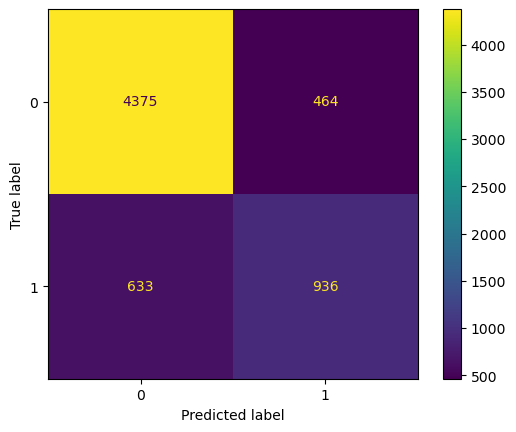

In [99]:
# confusion matrix using sklearn
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [100]:
# classification report
from sklearn.metrics import classification_report
# show results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4839
           1       0.67      0.60      0.63      1569

    accuracy                           0.83      6408
   macro avg       0.77      0.75      0.76      6408
weighted avg       0.82      0.83      0.83      6408



In [101]:
# ROC Curve Libraries
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

The results from our roc curve and auc score show that our model performs better than a baseline model of 50% accuracy. The auc, or area under the curve, for our data is 0.75. 

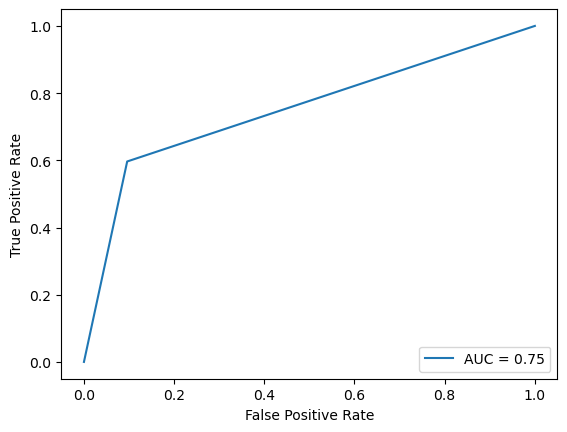

In [102]:
# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred)
# AUC 
auc = roc_auc_score(y_test, y_pred)
# display results
roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc).plot()

In [103]:
# AUC 
auc = roc_auc_score(y_test, y_pred)
auc

0.7503353686605445

### Cross Validation Using Stratified KFold

Cross validation is an important step in the machine learning process. Using a train-test split is better than having a model train on the entire dataset because this would cause it to overfit but by chance the observations in the train and test split may be very similar to eachother or very different to eachother which can cause prediction errors. Using a KFold cross validation we are able to use different train test splits and fit our model on each one. Here we use n_splits = 5 so that we are using 5 different train test split combinations to learn and predict on. We choose to use a stratified kfold technique because our data was not balanced (~23% make over 50K). This technique will try to balance our target variable in each split. The results show that each fold is very consistent with about 83% accuracy. 

Overall, we can conclude that we have a model that will classify the data with over 80% accuracy which can certainly be helpful, but is something that we should be careful using if passing this model for deployment. 

In [104]:
# create stratified object
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

In [105]:
# for loop to implement stratified k fold process
fold= 0
# X1 is our normalized data that was passed through our transformer pipeline
for train_idx, test_idx in skf.split(X1, y):
    # X1 is a numpy array
    X1_train = X1[train_idx]
    # use iloc because y_train is a data frame
    y_train = y.iloc[train_idx]
    
    X1_test = X1[test_idx]
    y_test = y.iloc[test_idx]
    
    # fit our model using the splits
    KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    our_model = KNN.fit(X1_train, y_train)
    # make prediction
    pred = our_model.predict(X1_test)
    # accuracy score
    accuracy = accuracy_score(y_test, pred)
    # print statement for each fold 
    print(f'***** Fold: {fold} *****')
    print(f' The accuracy for this fold is {accuracy}.')
    
    # increment fold count
    fold += 1

***** Fold: 0 *****
 The accuracy for this fold is 0.8314606741573034.
***** Fold: 1 *****
 The accuracy for this fold is 0.8358302122347067.
***** Fold: 2 *****
 The accuracy for this fold is 0.8373907615480649.
***** Fold: 3 *****
 The accuracy for this fold is 0.837234706616729.
***** Fold: 4 *****
 The accuracy for this fold is 0.8350241922896832.
